# Exercise 5

1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom

In [82]:
# 1. Already done

2. Create a new Jupyter notebook

In [83]:
# 2. This is the notebook

3. Load the dataset from CSV into pandas

In [84]:
import pandas as pd

file_path = './mushroom/agaricus-lepiota.data'

# Assigning the column names
column_names = [
    "poisonous", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", 
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", 
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", 
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

# Mushroom dataframe
df = None
try:
    df = pd.read_csv(file_path, header=None, names=column_names)
except FileNotFoundError:
    print("Download the dataset bro!")

df

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?

In [85]:
df.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


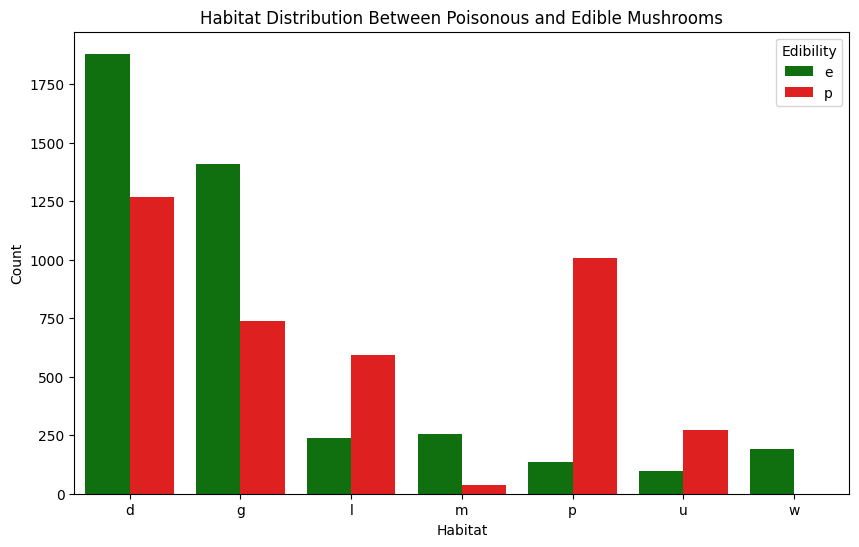

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution between habitat and poisonous/edible mushrooms
distribution = df.groupby(['habitat', 'poisonous']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=distribution, x='habitat', y='count', hue='poisonous', palette={'p': 'red', 'e': 'green'})
plt.title('Habitat Distribution Between Poisonous and Edible Mushrooms')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.legend(title='Edibility', loc='upper right')
plt.show()

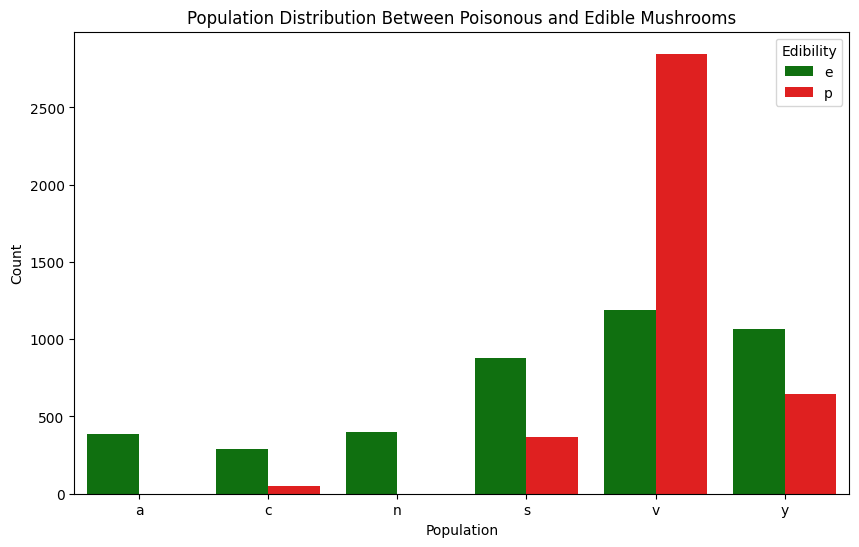

In [87]:
# Distribution between population and poisonous/edible mushrooms
distribution = df.groupby(['population', 'poisonous']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=distribution, x='population', y='count', hue='poisonous', palette={'p': 'red', 'e': 'green'})
plt.title('Population Distribution Between Poisonous and Edible Mushrooms')
plt.xlabel('Population')
plt.ylabel('Count')
plt.legend(title='Edibility', loc='upper right')
plt.show()

5. The data is entirely categorical. Convert each feature to dummy variables.

In [88]:
# Convert categorical features to dummy variables
df_dummies = pd.get_dummies(df)

df_dummies

,poisonous_e,poisonous_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
8121,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.

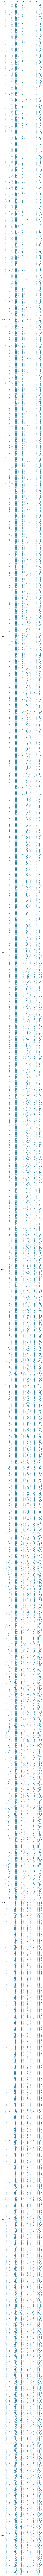

In [89]:
plt.spy(df_dummies, markersize=0.9)
fig = plt.gcf()
fig.set_size_inches(400, 400)
plt.plot()
plt.show()